# ENGR-E 533 Deep Learning Systems - Assignment 3

## Name : Akhila Sakiramolla (asakiram@iu.edu)
## UID : 2000886005

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import cv2
import os
import tensorflow as tf
import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import initializers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.callbacks import History 
from keras.layers.core import Dense, Activation
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM

# To execute a cell line by line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Problem 1: Data Augmentation

In [2]:
# Loading data

(x_train1, y_train1), (x_test, y_test) = cifar10.load_data()
x_train1.shape
y_train1.shape
x_test.shape
y_test.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

(50000, 1)

(10000, 32, 32, 3)

(10000, 1)

In [3]:
# Separating validation set

x_train = x_train1[0:45000]
y_train = y_train1[0:45000]
x_val = x_train1[45000:50000]
y_val = y_train1[45000:50000]

x_train.shape
y_train.shape
x_val.shape
y_val.shape

(45000, 32, 32, 3)

(45000, 1)

(5000, 32, 32, 3)

(5000, 1)

In [4]:
# Checking for min and max pixel values

x_train.min(), x_train.max()
x_val.min(), x_val.max()

(0, 255)

(0, 255)

In [5]:
# Scaling the pixel values between -1 and 1

x_train = (2*(x_train/255))-1
x_val = (2*(x_val/255))-1

x_train.min(), x_train.max()
x_val.min(), x_val.max()

(-1.0, 1.0)

(-1.0, 1.0)

In [6]:
# Coverting labels to categorical

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [7]:
# Building a model 

hist = History()
model = Sequential()
model.add(Input(shape = (32,32,3)))
model.add(Conv2D(10, kernel_size=(5,5), activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(), strides=1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(10, kernel_size=(5,5), activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(), strides=1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(20, activation='relu',kernel_initializer = tf.keras.initializers.HeNormal()))
model.add(Dense(10, activation='softmax',kernel_initializer = tf.keras.initializers.HeNormal()))

In [8]:
# Calculating loss and optimizing it

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Fitting the model

model.fit(x=x_train, y=y_train, batch_size=100, epochs=100, validation_data=(x_val, y_val),callbacks=[hist])

Epoch 1/100
450/450 [==============================] - 12s 5ms/step - loss: 1.8374 - accuracy: 0.3298 - val_loss: 1.5625 - val_accuracy: 0.4386
Epoch 2/100
450/450 [==============================] - 2s 4ms/step - loss: 1.4708 - accuracy: 0.4684 - val_loss: 1.4335 - val_accuracy: 0.4844
Epoch 3/100
450/450 [==============================] - 2s 4ms/step - loss: 1.3625 - accuracy: 0.5107 - val_loss: 1.3473 - val_accuracy: 0.5194
Epoch 4/100
450/450 [==============================] - 2s 4ms/step - loss: 1.2942 - accuracy: 0.5386 - val_loss: 1.2998 - val_accuracy: 0.5382
Epoch 5/100
450/450 [==============================] - 2s 4ms/step - loss: 1.2447 - accuracy: 0.5566 - val_loss: 1.2206 - val_accuracy: 0.5738
Epoch 6/100
450/450 [==============================] - 2s 4ms/step - loss: 1.2077 - accuracy: 0.5735 - val_loss: 1.2027 - val_accuracy: 0.5750
Epoch 7/100
450/450 [==============================] - 2s 4ms/step - loss: 1.1754 - accuracy: 0.5860 - val_loss: 1.1897 - val_accuracy: 0.581

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Validation Accuracy')

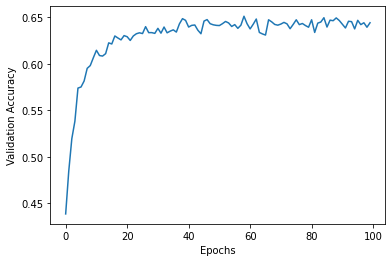

In [10]:
val_accuracy = hist.history['val_accuracy']
plt.plot(val_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')

In [11]:
# Scaling the pixel values between 0 and 1

x_train = x_train1[0:45000]
y_train = y_train1[0:45000]
x_val = x_train1[45000:50000]
y_val = y_train1[45000:50000]

x_train = x_train/255

x_train.min(), x_train.max()

(0.0, 1.0)

In [12]:
# Coverting labels to categorical

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [13]:
# Augumented dataset 1

x_train1 = np.minimum(1.1*x_train, 1)
x_train1.min(), x_train1.max()

(0.0, 1.0)

In [14]:
# Augumented dataset 2

x_train2 = 0.9*x_train
x_train2.min(), x_train2.max()

(0.0, 0.9)

In [15]:
# Augumented dataset 3

x_train3 = np.fliplr(x_train)
x_train3.min(), x_train3.max()

(0.0, 1.0)

Text(0.5, 1.0, 'Training dataset')

Text(0.5, 1.0, 'Augmented dataset 1')

Text(0.5, 1.0, 'Augmented dataset 2')

Text(0.5, 1.0, 'Augmented dataset 3')

<function matplotlib.pyplot.show(*args, **kw)>

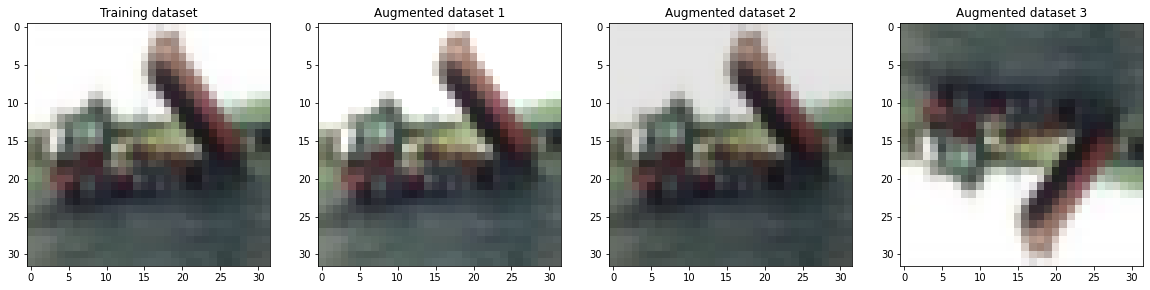

In [16]:
# Plotting images 

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
fig.set_figheight(5)
fig.set_figwidth(20)
ax1.imshow(x_train[2], interpolation='nearest')
ax1.set_title("Training dataset")
ax2.imshow(x_train1[2], interpolation='nearest')
ax2.set_title("Augmented dataset 1")
ax3.imshow(x_train2[2], interpolation='nearest')
ax3.set_title("Augmented dataset 2")
ax4.imshow(x_train3[2], interpolation='nearest')
ax4.set_title("Augmented dataset 3")
plt.show

In [17]:
# Scaling pixel values to -1 and 1

x_train = (2*(x_train/np.amax(x_train)))-1
x_train1 = (2*(x_train1/np.amax(x_train1)))-1
x_train2 = (2*(x_train2/np.amax(x_train2)))-1
x_train3 = (2*(x_train3/np.amax(x_train3)))-1

x_val=(2*(x_val/255))-1

In [18]:
# Concating the datasets

X_train = np.vstack((x_train,x_train1,x_train2,x_train3))
Y_train = np.vstack((y_train,y_train,y_train,y_train))
X_train.shape
Y_train.shape

(180000, 32, 32, 3)

(180000, 10)

In [19]:
x_val.shape
y_val.shape

(5000, 32, 32, 3)

(5000, 10)

In [20]:
# Building a model 

hist1 = History()
model = Sequential()
model.add(Input(shape = (32,32,3)))
model.add(Conv2D(10, kernel_size=(5,5), activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(), strides=1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(10, kernel_size=(5,5), activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(), strides=1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(20, activation='relu',kernel_initializer = tf.keras.initializers.HeNormal()))
model.add(Dense(10, activation='softmax',kernel_initializer = tf.keras.initializers.HeNormal()))

In [21]:
# Calculating loss and optimizing it

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Fitting the model
model.fit(x=X_train, y=Y_train, batch_size=100, epochs=100, validation_data=(x_val, y_val),callbacks=[hist1])

Epoch 1/100
1800/1800 [==============================] - 7s 4ms/step - loss: 1.5854 - accuracy: 0.4231 - val_loss: 1.3189 - val_accuracy: 0.5312
Epoch 2/100
1800/1800 [==============================] - 7s 4ms/step - loss: 1.3327 - accuracy: 0.5226 - val_loss: 1.2393 - val_accuracy: 0.5692
Epoch 3/100
1800/1800 [==============================] - 6s 4ms/step - loss: 1.2507 - accuracy: 0.5540 - val_loss: 1.1487 - val_accuracy: 0.6062
Epoch 4/100
1800/1800 [==============================] - 6s 4ms/step - loss: 1.1975 - accuracy: 0.5745 - val_loss: 1.1374 - val_accuracy: 0.6046
Epoch 5/100
1800/1800 [==============================] - 7s 4ms/step - loss: 1.1616 - accuracy: 0.5893 - val_loss: 1.1105 - val_accuracy: 0.6148
Epoch 6/100
1800/1800 [==============================] - 7s 4ms/step - loss: 1.1371 - accuracy: 0.5989 - val_loss: 1.1001 - val_accuracy: 0.6218
Epoch 7/100
1800/1800 [==============================] - 7s 4ms/step - loss: 1.1148 - accuracy: 0.6083 - val_loss: 1.0810 - val_ac

In [23]:
val_accuracy1 = hist1.history['val_accuracy']

<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Validation Accuracy')

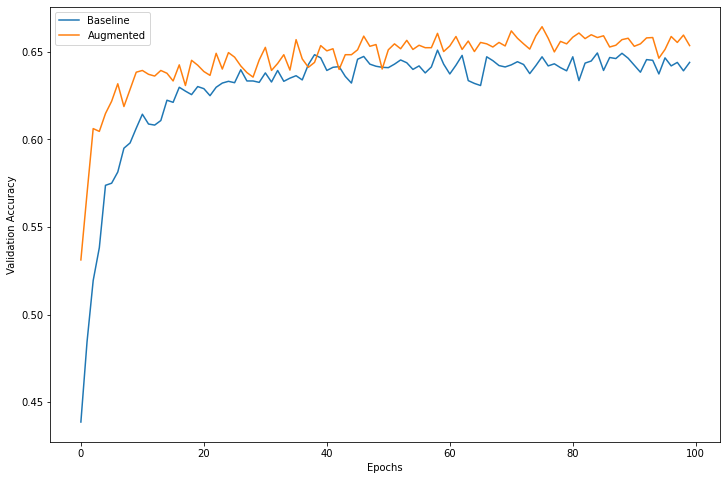

In [24]:
plt.figure(figsize=(12,8))
plt.plot(val_accuracy, label='Baseline')
plt.plot(val_accuracy1, label='Augmented')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
